<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Análise de Risco de Crédito direcionada por Modelagem Matemática e Estatística
</h1>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este Notebook concentra código fonte da Tese de Bacharelado do curso de Engenharia de Controle e Automação da UNESP Sorocaba desenvolvido pelo aluno Leonardo Aderaldo Vargas.  </i> 
</p>  

# <font color='red' style='font-size: 40px;'> Problemática </font>
<hr style='border: 2px solid red;'>

Amostra baseada na base de dados do Lending Club Loan Data : https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv/data

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Lending Club é uma empresa de empréstimos peer-to-peer com sede nos EUA. Eles combinam pessoas que desejam investir dinheiro com pessoas que desejam pedir dinheiro emprestado. Quando os investidores investem o seu dinheiro através do Lending Club, esse dinheiro é repassado aos mutuários e, quando os mutuários pagam os seus empréstimos, o capital mais os juros são repassados ​​aos investidores. É uma vitória para todos, pois podem obter taxas de empréstimo normalmente mais baixas e retornos mais elevados para os investidores.</i>
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i>O conjunto de dados Lending Club contém dados completos de empréstimos para todos os empréstimos emitidos entre 2007-2015, incluindo a situação atual do empréstimo (atual, atrasado, totalmente pago, etc.) e as informações de pagamento mais recentes. Os recursos (também conhecidos como variáveis) incluem pontuação de crédito, número de consultas financeiras, endereço incluindo códigos postais e estado, e cobranças, entre outros. As cobranças indicam se o cliente perdeu um ou mais pagamentos e a equipe está tentando recuperar o dinheiro. O arquivo é uma amostra da base de dados exposta.</i>
</p>  





# <font color='red' style='font-size: 40px;'> Library   </font>
<hr style='border: 2px solid red;'>

In [49]:
# Importação das Bibliotecas e Parâmetros de Otimização
from functions import *
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# Spark Session
# from pyspark.sql import SparkSession, Row 
# #from pyspark.sql.functions import * as F
# import pyspark.sql.functions as F
# spark = SparkSession.builder.getOrCreate()

# <font color='red' style='font-size: 40px;'> 1. Pré-Processamento </font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 1.1) Descrição da Base de Dados </font>
<hr style='border: 2px solid green;'>

### Variável Target (VALIDADO)

> 1. loan_status: Situação atual do empréstimo, sendo possível classificar o Cliente em Bom ou Ruim (IMPORTANTE)

### Variável ID (VALIDADO)

> 1. member_id: Id do solicitante (IMPORTANTE)


### Variáveis Referentes ao Produto (VALIDADO)

> 1. term: O número de pagamentos do empréstimo, podendo serem 36 parcelas ou 60 (IMPORTANTE)

> 2. grade: Grau de empréstimo atribuído (IMPORTANTE)

> 3. sub_grade: Subclasse de empréstimo atribuído (IMPORTANTE)

> 4. purpose: Categoria (MCC/CNAE por exemplo) fornecida pelo cliente para pegar o empréstimo (IMPORTANTE)

> 5. loan_amnt: Valor do empréstimo solicitado pelo mutuário; Se em algum momento o departamento de crédito reduzir do empréstimo, isso será refletido nesse valor (IMPORTANTE)

> 6. int_rate: Taxa de juros do empréstimo (IMPORTANTE)

> 7. issue_d: Data em que o empréstimo foi financiado (IMPORTANTE)

> 8. policy_code: Flag que indica Produto disponível publicamente ou não (IMPORTANTE)

> 9. pymnt_plan: Flag que indica se um plano de pagamento foi implementado para o empréstimo (IMPORTANTE)

> 10. initial_list_status: Status de listagem inicial do empréstimo. Os valores possíveis são W-F (IMPORTANTE)

> 11. installment: O pagamento mensal devido pelo mutuário se o empréstimo for originado. (Em termos simples, a originação de um empréstimo é o ponto de partida, onde o mutuário (a pessoa ou entidade que pede o empréstimo) solicita o empréstimo a um credor (a instituição financeira ou pessoa que empresta o dinheiro) e o credor avalia a solicitação, verifica a elegibilidade do mutuário e decide se concederá ou não o empréstimo.) (IMPORTANTE)

 ### Variáveis Referentes ao Cliente (VALIDADO)

 > 1. emp_title: O cargo fornecido pelo cliente ao solicitar o empréstimo (IMPORTANTE)

 > 2. emp_length: Duração do emprego que ele está em anos, sendo que 0 significa menos de 1 ano e 10 significa dez ou mais anos (IMPORTANTE)

 > 3. home_ownership: Flag que indica o Status da propriedade residencial do cliente ao solicitar o empréstimo, podenso ser aluguel, próprio, hipoteca, outros. (IMPORTANTE)

 > 4. verification_status: Flag que indica se a renda foi comprovada, não comprovada (IMPORTANTE)

 > 5. O número de incidências de inadimplência vencidas há mais de 30 dias no arquivo de crédito do mutuário nos últimos 2 anos (IMPORTANTE)

 > 6. annual_inc: Renda anual declarada pelo cliente (IMPORTANTE)

 > 7. addr_state: Estado do Cliente (IMPORTANTE)

 > 8. tot_cur_bal: Limite total considerando todos os produtos de crédito (IMPORTANTE)

 > 9. total_rev_hi_lim: Limite de rotativos total (IMPORTANTE)
 
 > 10. revol_bal: Limite de rotativos utilizado (IMPORTANTE)

 > 11. revol_util: Taxa de utilização de Limite de rotativos [revol_bal/total_rev_hi_lim] (IMPORTANTE)

 > 12. open_acc: Número de produtos de crédito atualmente contratados no histórico do cliente (IMPORTANTE)

 > 13. total_acc: Número total de produtos de crédito contratados no histórico do cliente (IMPORTANTE)

 > 14. pub_rec: Número de registros públicos depreciativos (IMPORTANTE)
 
 > 15. inq_last_6mths: Número de consultas nos últimos 6 meses (excluindo consultas sobre automóveis e hipotecas) (IMPORTANTE)

 > 16. earliest_cr_line: Data em que o primeiro produto de crédito foi contratado pelo cliente (IMPORTANTE)

 > 17. mths_since_last_record: Número de meses desde o último registro público (IMPORTANTE)

 > 18. mths_since_last_major_derog: Meses desde a classificação mais recente de 90 dias ou menos (IMPORTANTE)

 > 19. mths_since_last_delinq: O número de meses desde a última inadimplência do mutuário (IMPORTANTE)


In [2]:
df = pd.read_parquet('data/credit_risk_loan_data.parquet').drop(['id', 'url', 'member_id'], axis = 1)

# <font color='green' style='font-size: 30px;'> 1.2) Definição da Target </font>
<hr style='border: 2px solid green;'>

> 1. A priori, deve-se definir de maneira clara as situações consideradas como Default. Definiu-se um cliente ruim como aquele o qual está em:

- Processo de cobraça ('Charged Off')
- Inadimplente ('Default')
- Atrasado (31 dias ou mais)
- Critérios Mínimos de Aprovação - CMA ('Does not meet the credit policy. Status:Charged Off')
- Possui 1 ou mais contas em inadimplência

> 2. A partir desta definição, deve-se criar a Target mostrando exatamente o que é um cliente Bom ou Ruim 

> 3. Escolheu-se o número "0" para representar o cliente Bom e o número "1" para representar o cliente Ruim, pois o evento de interesse é definir principalmente quem são os Maus Pagadores a fim de evitar ao máximo a inadimplêmcia

> 4. Nota-se que em torno de 88.74% dos clientes são adimplentes, ao passo que 11.26% tornou-se inadimplente

> 5. Esta situação caracteriza um problema de classes desbalanceadas, portanto, isso deve-se ser levado em consideração durante o processo de modelagem e aplicar técnicas para lidar com este tipo de caso

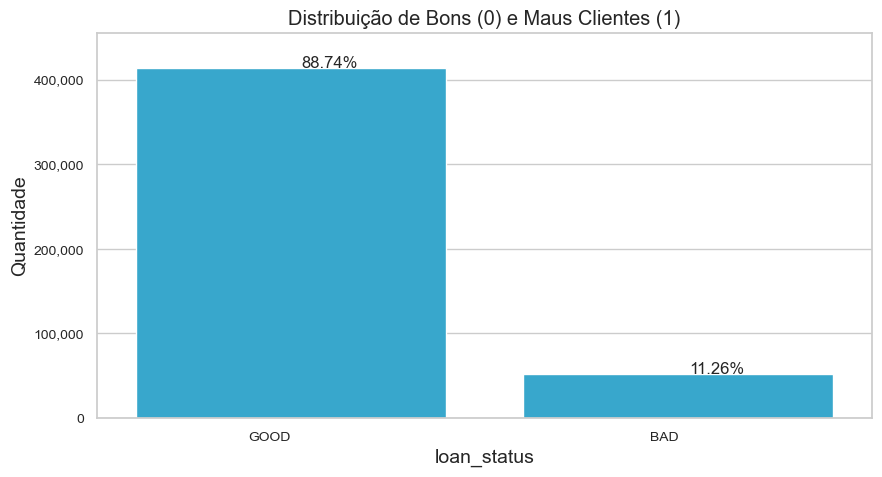

In [3]:
df['loan_status'] = np.where(df['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off']) | df['acc_now_delinq'].fillna(0) != 0, 'BAD', 'GOOD') 
plota_barras(['loan_status'], False, df, 1, 1, 'Distribuição de Bons (0) e Maus Clientes (1)', 0)
df['loan_status'] = np.where(df['loan_status'] == 'BAD', 1, 0)

# <font color='green' style='font-size: 30px;'> 1.3) Separação em Treino e Teste </font>
<hr style='border: 2px solid green;'>

> 1. Antes de realizar qualquer análise ou modelagem, deve-se separar em Treino e Teste a fim de simular um ambiente real

> 2. Ao separar antes de qualquer alteração, evita-se um erro muito grave denominado Data leakage

> 3. As análises serão realizadas unicamente sobre a base de Treinamento, simulando um ambiente real no qual a priori a base de Teste seria inexistente 

In [4]:
df_train = separa_treino_teste('loan_status', df, 0.20)[0]
df_test = separa_treino_teste('loan_status', df, 0.20)[1]

print(f'Quantidade de Dados Utilizados para Treinamento: {df_train.shape[0]}')
print(f'Quantidade de Dados Utilizados para Teste: {df_test.shape[0]}')

Quantidade de Dados Utilizados para Treinamento: 373028
Quantidade de Dados Utilizados para Teste: 93257


# <font color='green' style='font-size: 30px;'> 1.4) Variáveis de Entrada </font>
<hr style='border: 2px solid green;'>

> 1. Após a análise de variáveis de Produtos e Clientes, definiu-se quais serão utilizadas como entrada do modelo 

In [5]:
columns_selected = ['loan_status','term','grade','sub_grade','purpose', 'delinq_2yrs', 'loan_amnt','int_rate','issue_d','policy_code','pymnt_plan','initial_list_status','installment','emp_length','home_ownership',
'verification_status','annual_inc','addr_state', 'tot_cur_bal','total_rev_hi_lim','revol_bal','revol_util','open_acc','total_acc','pub_rec','inq_last_6mths','earliest_cr_line','mths_since_last_record', 'mths_since_last_major_derog',
'mths_since_last_delinq']

df_train = df_train[columns_selected]
df_test = df_test[columns_selected]
print(f'Existem {len(columns_selected)} variáveis excluindo as que são referentes a Pagamento ou variáveis totalmente irrelevantes no Dataset')

Existem 30 variáveis excluindo as que são referentes a Pagamento ou variáveis totalmente irrelevantes no Dataset


# <font color='red' style='font-size: 40px;'> 2. Engenharia de Atributos </font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 2.1) Anos no emprego atual</font>
<hr style='border: 2px solid green;'>

In [6]:
def numero_de_anos_emprego_atual(df):
    df['emp_length'] = (df['emp_length'].replace({'< 1 year':0, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6, '7 years':7, '8 years':8, '9 years':9,'10+ years':10}).fillna(0))
    df['emp_length'] = df['emp_length'].apply(lambda x:int(x))
    df['emp_length'] = np.where(df['emp_length'] <= 3, '3_YEARS', 
                        np.where(df['emp_length'] <= 6, '6_YEARS',
                        np.where(df['emp_length'] <= 9, '9_YEARS',
                        '10_YEARS+')))
    return df['emp_length']

df_train['emp_length'] = numero_de_anos_emprego_atual(df_train)

# <font color='green' style='font-size: 30px;'> 2.2) Número de Registros Negativos</font>
<hr style='border: 2px solid green;'>

In [7]:
def numero_de_registros_negativos(df):

    df = df[['loan_status', 'pub_rec']].copy()
    df[['pub_rec']] = np.where(df[['pub_rec']] == 0, 'sem_registros_negativos', 'com_registros_negativos')

    return df['pub_rec']

df_train['pub_rec'] = numero_de_registros_negativos(df_train)

# <font color='green' style='font-size: 30px;'> 2.3) Consulta de Crédito nos Últimos 6 meses</font>
<hr style='border: 2px solid green;'>

In [8]:
def consulta_de_credito_nos_ultimos_6_meses(df):
    df = df[['loan_status', 'inq_last_6mths']].copy()
    df[['inq_last_6mths']] = np.where(df[['inq_last_6mths']] == 0, 'sem_consultas', 'com_consultas')

    return df['inq_last_6mths']

df_train['inq_last_6mths'] = consulta_de_credito_nos_ultimos_6_meses(df_train)

# <font color='green' style='font-size: 30px;'> 2.4) Comprometimento de Renda</font>
<hr style='border: 2px solid green;'>

In [9]:
def compromento_de_renda(df): 
    df_aux = df[['annual_inc', 'installment', 'loan_amnt', 'term', 'int_rate', 'loan_status']].copy()
    df_aux['term'] = np.where(df_aux['term'] == ' 36 months', 36, 60)
    df_aux['loan_amnt_with_int_rate'] = df_aux['installment']*df_aux['term']
    df_aux['annual_payment'] = np.where(df_aux['term'] == ' 36 months', df_aux['loan_amnt_with_int_rate']/3, df_aux['loan_amnt_with_int_rate']/5)
    df_aux['annual_income_commitment_rate'] = ((df_aux['annual_payment']/df_aux['annual_inc'])*100).round(2)
    
    return df_aux['annual_income_commitment_rate']

df_train['annual_income_commitment_rate'] = compromento_de_renda(df_train)

# <font color='green' style='font-size: 30px;'> 2.5) Número de incidências de inadimplência vencidas há mais de 30 dias no arquivo de crédito do mutuário nos últimos 2 anos</font>
<hr style='border: 2px solid green;'>

In [10]:
def numero_incidencias_inadimplencia_vencidas_30d(df):
    df_aux = df[['loan_status', 'delinq_2yrs']].copy()
    df_aux['delinq_2yrs'] = np.where(df_aux[['delinq_2yrs']] == 0, 'sem_inadimplencia_vencida', 'com_inadimplencia_vencida')

    return df_aux['delinq_2yrs']

df_train['delinq_2yrs'] = numero_incidencias_inadimplencia_vencidas_30d(df_train)

# <font color='green' style='font-size: 30px;'> 2.6) Número de meses desde a contratação do produto de crédito atual</font>
<hr style='border: 2px solid green;'>

In [11]:
def n_meses_produto_credito_atual(df):
    df = df.copy()
    df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
    df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2023-09-20') - df['issue_d'])/np.timedelta64(1, 'M')))
    df['mths_since_issue_d'] = df['mths_since_issue_d'].fillna(df['mths_since_issue_d'].median())
    df['mths_since_issue_d'] = np.where(df['mths_since_issue_d'] < 0, df['mths_since_issue_d'].median(), df['mths_since_issue_d'])
    df['mths_since_issue_d'] = df['mths_since_issue_d'].apply(lambda x:int(x))
    df['issue_d'] = df['mths_since_issue_d']

    return df['issue_d']

df_train['issue_d'] = n_meses_produto_credito_atual(df_train)

# <font color='green' style='font-size: 30px;'> 2.7) Número de meses desde a contratação do primeiro produto de crédito</font>
<hr style='border: 2px solid green;'>

In [12]:
def n_meses_primeiro_produto_credito(df):
    df = df.copy()
    df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')
    df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2023-09-20') - df['earliest_cr_line'])/np.timedelta64(1, 'M')))
    df['mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].fillna(df['mths_since_earliest_cr_line'].median())
    df['mths_since_earliest_cr_line'] = np.where(df['mths_since_earliest_cr_line'] < 0, df['mths_since_earliest_cr_line'].median(), df['mths_since_earliest_cr_line'])
    df['mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].apply(lambda x:int(x))
    df['earliest_cr_line'] = df['mths_since_earliest_cr_line']
    
    return df['earliest_cr_line']

df_train['earliest_cr_line'] = n_meses_primeiro_produto_credito(df_train)

# <font color='green' style='font-size: 30px;'> 2.8) Formato das Features Binárias </font>
<hr style='border: 2px solid green;'>

In [13]:
def formato_features_binarias(df):
    df['term'] = np.where(df['term'] == ' 36 months', 0, 1)
    df['delinq_2yrs'] = np.where(df['delinq_2yrs'] == 'sem_inadimplencia_vencida', 0, 1)
    df['initial_list_status'] = np.where(df['initial_list_status'] == 'f', 0, 1)
    df['pymnt_plan'] = np.where(df['pymnt_plan'] == 'n', 0, 1)
    df['verification_status'] = np.where(df['verification_status'] == 'Source Verified', 0, 1)
    df['inq_last_6mths'] = np.where(df['inq_last_6mths'] == 'com_consultas', 0, 1)

    return df

df_train = formato_features_binarias(df_train)

# <font color='green' style='font-size: 30px;'> 2.9) Features Estatísticas</font>
<hr style='border: 2px solid green;'>

In [14]:
def taxa_de_bad_por_categoria(df, tipo):
    categoricas = ['term', 'grade', 'sub_grade', 'purpose', 'policy_code', 'initial_list_status', 'pymnt_plan', 'emp_length', 'home_ownership', 'verification_status', 'addr_state', 'pub_rec', 'inq_last_6mths']
    df_aux_2 = df.copy()
    if tipo == 'Criação':
        for cat in categoricas:
            df_aux = df[[f'{cat}', 'loan_status']].copy()
            good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 0].groupby(f'{cat}', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
            bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 1].groupby(f'{cat}', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
            df_aux = good.merge(bad, on = f'{cat}', how = 'left')
            df_aux['qt_total'] = df_aux['qt_good'] + df_aux['qt_bad']
            df_aux[f'bad_rate_{cat}'] = ((df_aux['qt_bad']/df_aux['qt_total'])*100).round(2)
            df_aux[f'bad_rate_{cat}'] = df_aux[f'bad_rate_{cat}'].apply(lambda x:float(x))
            df_aux = df_aux[[f'{cat}', f'bad_rate_{cat}']].drop_duplicates().sort_values(by = f'bad_rate_{cat}', ascending = True)
            df_aux.to_csv(f'features/bad_rate_{cat}.csv', index = False)
            df_aux_2 = df_aux_2.merge(df_aux[[f'{cat}', f'bad_rate_{cat}']], on = f'{cat}', how = 'left')
    else:
        for cat in categoricas:
            ft = pd.read_csv(f'features/bad_rate_{cat}.csv')
            replace_dict = dict(zip(ft[f'{cat}'], ft[f'bad_rate_{cat}']))
            df_aux_2[f'bad_rate_{cat}'] = df_aux_2[f'{cat}'].replace(replace_dict)

    return df_aux_2

df_train = taxa_de_bad_por_categoria(df_train, 'Criação')

In [15]:
def media_categoria_variavel_quantitativa(df, tipo):
    df_aux_2 = df.copy()
    categoricas = ['term', 'grade', 'sub_grade', 'purpose', 'delinq_2yrs', 'policy_code', 'initial_list_status', 'pymnt_plan', 'emp_length', 'home_ownership', 'verification_status', 'addr_state', 'pub_rec', 'inq_last_6mths']
    quantitativas = ['loan_amnt', 'int_rate', 'annual_inc', 'annual_income_commitment_rate', 'tot_cur_bal', 'total_rev_hi_lim', 'revol_util', 'open_acc', 'total_acc']
    if tipo == 'Criação':
        for cat in categoricas:
            for quant in quantitativas:
                df_aux = df[[f'{cat}', f'{quant}']].copy()
                df_aux = pd.DataFrame(df_aux.groupby(f'{cat}', as_index = False)[f'{quant}'].mean()).rename({f'{quant}':f'mean_{cat}_{quant}'}, axis = 1)
                df_aux[f'mean_{cat}_{quant}'] = df_aux[f'mean_{cat}_{quant}'].apply(lambda x:float(x))
                df_aux[[f'{cat}', f'mean_{cat}_{quant}']].drop_duplicates().sort_values(by = f'mean_{cat}_{quant}', ascending = True)
                df_aux.to_csv(f'features/mean_{cat}_{quant}.csv', index = False)
                df_aux_2 = df_aux_2.merge(df_aux[[f'{cat}', f'mean_{cat}_{quant}']], on = f'{cat}', how = 'left')
    else:
        for cat in categoricas:
            for quant in quantitativas:
                ft = pd.read_csv(f'features/mean_{cat}_{quant}.csv')
                replace_dict = dict(zip(ft[f'{cat}'], ft[f'mean_{cat}_{quant}']))
                df_aux_2[f'mean_{cat}_{quant}'] = df_aux_2[f'{cat}'].replace(replace_dict)

    return df_aux_2

df_train = media_categoria_variavel_quantitativa(df_train, 'Criação')
df_train.drop('addr_state', axis = 1, inplace = True)


# <font color='red' style='font-size: 40px;'> 3. Feature Selection </font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 3.1) Verificação de Variáveis Nulas ou Irrelevantes </font>
<hr style='border: 2px solid green;'>

> 1. Excluiu-se as variáveis que possuem 100% dos registros nulos

> 2. Excluiu-se também as variáveis que falam a respeito de questões de Pagamento, pois esse fenômeno é após a concessão do crédito e, como um modelo de PD serve para decidir quem pode ou não receber tal concessão, seria errado incluir variáveis de pagamento nas análises ou na modelagem


In [16]:
df_nulls = pd.DataFrame(df_train.isnull().sum()).reset_index().rename({0:'nulls_amnt'}, axis = 1)
df_nulls['nulls_rate'] = df_nulls['nulls_amnt']/df_train.shape[0]
print(f'Existem {len(df_nulls)} variáveis no Dataset')
df_not_nulls_nulls = df_nulls.loc[df_nulls['nulls_rate'] == 0]
columns_not_nulls = list(df_not_nulls_nulls['index'])
print(f'Existem {len(columns_not_nulls)} variáveis sem registros nulos no Dataset')


Existem 169 variáveis no Dataset
Existem 153 variáveis sem registros nulos no Dataset


# <font color='green' style='font-size: 30px;'> 3.2) Verificação de Variáveis Categóricas e Numéricas </font>
<hr style='border: 2px solid green;'>

> 1. Para facilitar a Análise Exploratória, segmentou-se as variáveis em Qualitativas e Quantitativas.

> 2. Definiu-se essas classificações a fim de aplicar técnicas estatatísticas corretas para analisá-las

> 3. Essa abordagem é importante pois cada tipo de variável tem um jeito de ser avaliada. 

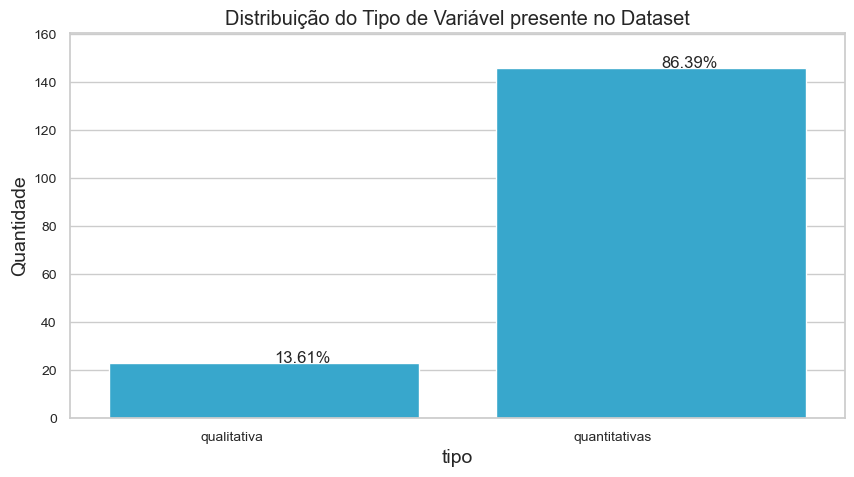

In [17]:
variaveis = verifica_tipo_variavel(df_train)
plota_barras(['tipo'], False, variaveis, 1, 1, 'Distribuição do Tipo de Variável presente no Dataset', 0)

# <font color='green' style='font-size: 30px;'> 3.3) Aplicações de Imputer e Encoder </font>
<hr style='border: 2px solid green;'>

> 1. Para realizar o Feature Selection, é importante termos as variáveis categóricas previamente tratadas com Encoder

> 2. Além disso, é de suma importância não termos dados nulos

In [18]:
def binary_encoder(df):
    categoricas = ['grade', 'sub_grade', 'purpose', 'policy_code', 'emp_length', 'home_ownership', 'pub_rec']

    encoder = BinaryEncoder(cols=categoricas)
    encoder.fit(df)

    return encoder

df_aux = df_train.copy()
encoder = binary_encoder(df_aux)
df_aux_encoded = encoder.transform(df_aux)
    

In [48]:
def simple_imputer(df):

    df_aux = df.copy()
    imputer = SimpleImputer(strategy = 'median')
    imputer.fit(df_aux)

    return imputer

In [20]:
df_aux = df_aux_encoded.copy()
imputer = simple_imputer(df_aux)
df_aux_imputed = pd.DataFrame(imputer.transform(df_aux), columns = df_aux_encoded.columns)

# <font color='green' style='font-size: 30px;'> 3.4) Variance Threshold </font>
<hr style='border: 2px solid green;'>

> 1. Aplicou-se um Corte de Variância nas variáveis para eliminar aquelas as quais eram praticamente constantes e não agregam informação útil para discriminar a Target 

In [21]:
df_aux = df_aux_imputed[remove_features_baixa_variancia('loan_status', df_aux_imputed, 0.1)]
print(df_aux.shape)

(373028, 137)


# <font color='green' style='font-size: 30px;'> 3.5) Mutual Information </font>
<hr style='border: 2px solid green;'>

> 1. Posteriormente, como temos uma Target qualitativa e Features discretas e contínuas, optou-se pela seleção a partir do cálculo de Informação Mútua 

> 2. A informação mútua é uma medida estatística que quantifica a dependência entre duas variáveis aleatórias, logo, avalia a relevância ou a importância das variáveis de entrada em relação à variável de saída. Ela mede o quanto a informação de uma variável ajuda a prever a outra variável.

In [22]:
df_aux = df_aux[remove_features_mutual_information('loan_status', df_aux, 0)[1]]
print(df_aux.shape)

(373028, 137)


# <font color='green' style='font-size: 30px;'> 3.6) Feature Importance </font>
<hr style='border: 2px solid green;'>

> 1. Finalmente, as variáveis restantes foram definidas pela Importância da Feature através de um Random Forest, o qual calcula a importância de cada variável para reduzir a função de custo e mostra quais variáveis são mais importantes para que o modelo acerte corretamente a Target 

> 2. Escolheu-se levar para os testes de Modelagem apenas Features com Feature Importance > 0.01, ou seja, que possuem ao menos 1% de contribuição para o Modelo 

In [24]:
feature_importances = remove_features_feature_importance('loan_status', df_aux, 10, 0.01)[1]
df_aux = df_aux[remove_features_feature_importance('loan_status', df_aux, 10, 0.01)[0]]
print(df_aux.shape)

(373028, 25)


# <font color='green' style='font-size: 30px;'> 3.7) Features Selecionadas </font>
<hr style='border: 2px solid green;'>

> 1. 24 Features foram selecionadas para entrarem neste modelo 

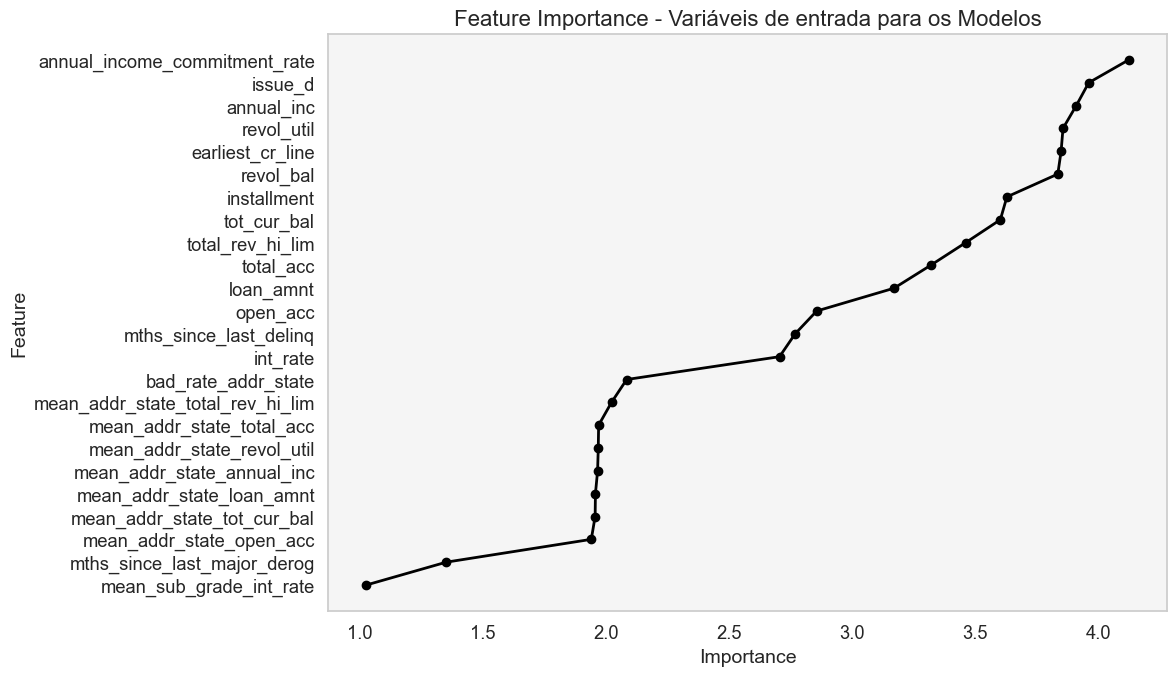

In [37]:
feature_importances = pd.read_csv('features/features_selected.csv')
feature_importances = feature_importances.loc[feature_importances['importance'] > 1] 
# Define o tamanho do gráfico
plt.figure(figsize=(12, 7))
# Define o estilo
sns.set(style="whitegrid", font_scale=1.2)
# Plota o gráfico
plt.plot(feature_importances['importance'], feature_importances['feature'], marker='o', color='black', linewidth=2)
# Adiciona um título
plt.title("Feature Importance - Variáveis de entrada para os Modelos", fontsize=16)
# Adiciona rótulos aos eixos
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
# Ajusta o layout
plt.tight_layout()
# # Remove a grade
plt.grid(False)
# # Remove a caixa ao redor do gráfico
#plt.box(False)
# Adiciona cor de fundo
# plt.set_facecolor('#F5F5F5')
# Adiciona grade horizontal para facilitar a leitura
#plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
# Inverte a ordem das features no eixo y para exibir a mais importante no topo
plt.gca().invert_yaxis()
plt.gca().set_facecolor('#F5F5F5')
# Mostra o gráfico
plt.show()


# <font color='red' style='font-size: 40px;'> 4. Modelagem Inicial  </font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 4.1) Redefindo os Dataframes de Treino e Teste </font>
<hr style='border: 2px solid green;'>


In [26]:
del df_aux 
del df_train 
del df_test 

In [151]:
df = pd.read_parquet('data/credit_risk_loan_data.parquet').drop(['id', 'url', 'member_id'], axis = 1)
df['loan_status'] = np.where(df['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off']) | df['acc_now_delinq'].fillna(0) != 0, 'BAD', 'GOOD') 
df['loan_status'] = np.where(df['loan_status'] == 'BAD', 1, 0)

columns_selected = ['loan_status', 'term','grade','sub_grade','purpose', 'delinq_2yrs', 'loan_amnt','int_rate','issue_d','policy_code','pymnt_plan','initial_list_status','installment','emp_length','home_ownership',
'verification_status','annual_inc','addr_state', 'tot_cur_bal','total_rev_hi_lim','revol_bal','revol_util','open_acc','total_acc','pub_rec','inq_last_6mths','earliest_cr_line','mths_since_last_record', 'mths_since_last_major_derog',
'mths_since_last_delinq']

df = df[columns_selected]

df_train_raw = separa_treino_teste('loan_status', df, 0.20)[0]
df_test_raw = separa_treino_teste('loan_status', df, 0.20)[1] 


df_train_silver = df_train_raw[columns_selected]
df_test_silver= df_test_raw[columns_selected]

In [39]:
df_train_silver['emp_length'] = numero_de_anos_emprego_atual(df_train_silver)
df_train_silver['pub_rec'] = numero_de_registros_negativos(df_train_silver)
df_train_silver['inq_last_6mths'] = consulta_de_credito_nos_ultimos_6_meses(df_train_silver)
df_train_silver['annual_income_commitment_rate'] = compromento_de_renda(df_train_silver)
df_train_silver['delinq_2yrs'] = numero_incidencias_inadimplencia_vencidas_30d(df_train_silver)
df_train_silver['issue_d'] = n_meses_produto_credito_atual(df_train_silver)
df_train_silver['earliest_cr_line'] = n_meses_primeiro_produto_credito(df_train_silver)
df_train_silver = formato_features_binarias(df_train_silver)
df_train_silver = taxa_de_bad_por_categoria(df_train_silver, 'escoragem')
df_train_silver = media_categoria_variavel_quantitativa(df_train_silver, 'escoragem')
print(df_train_silver.shape)
df_train_silver.head()

(373028, 170)


,loan_status,term,grade,sub_grade,purpose,delinq_2yrs,loan_amnt,int_rate,issue_d,policy_code,pymnt_plan,initial_list_status,installment,emp_length,home_ownership,verification_status,annual_inc,addr_state,tot_cur_bal,total_rev_hi_lim,revol_bal,revol_util,open_acc,total_acc,pub_rec,inq_last_6mths,earliest_cr_line,mths_since_last_record,mths_since_last_major_derog,mths_since_last_delinq,annual_income_commitment_rate,bad_rate_term,bad_rate_grade,bad_rate_sub_grade,bad_rate_purpose,bad_rate_policy_code,bad_rate_initial_list_status,bad_rate_pymnt_plan,bad_rate_emp_length,bad_rate_home_ownership,bad_rate_verification_status,bad_rate_addr_state,bad_rate_pub_rec,bad_rate_inq_last_6mths,mean_term_loan_amnt,mean_term_int_rate,mean_term_annual_inc,mean_term_annual_income_commitment_rate,mean_term_tot_cur_bal,mean_term_total_rev_hi_lim,...,mean_emp_length_tot_cur_bal,mean_emp_length_total_rev_hi_lim,mean_emp_length_revol_util,mean_emp_length_open_acc,mean_emp_length_total_acc,mean_home_ownership_loan_amnt,mean_home_ownership_int_rate,mean_home_ownership_annual_inc,mean_home_ownership_annual_income_commitment_rate,mean_home_ownership_tot_cur_bal,mean_home_ownership_total_rev_hi_lim,mean_home_ownership_revol_util,mean_home_ownership_open_acc,mean_home_ownership_total_acc,mean_verification_status_loan_amnt,mean_verification_status_int_rate,mean_verification_status_annual_inc,mean_verification_status_annual_income_commitment_rate,mean_verification_status_tot_cur_bal,mean_verification_status_total_rev_hi_lim,mean_verification_status_revol_util,mean_verification_status_open_acc,mean_verification_status_total_acc,mean_addr_state_loan_amnt,mean_addr_state_int_rate,mean_addr_state_annual_inc,mean_addr_state_annual_income_commitment_rate,mean_addr_state_tot_cur_bal,mean_addr_state_total_rev_hi_lim,mean_addr_state_revol_util,mean_addr_state_open_acc,mean_addr_state_total_acc,mean_pub_rec_loan_amnt,mean_pub_rec_int_rate,mean_pub_rec_annual_inc,mean_pub_rec_annual_income_commitment_rate,mean_pub_rec_tot_cur_bal,mean_pub_rec_total_rev_hi_lim,mean_pub_rec_revol_util,mean_pub_rec_open_acc,mean_pub_rec_total_acc,mean_inq_last_6mths_loan_amnt,mean_inq_last_6mths_int_rate,mean_inq_last_6mths_annual_inc,mean_inq_last_6mths_annual_income_commitment_rate,mean_inq_last_6mths_tot_cur_bal,mean_inq_last_6mths_total_rev_hi_lim,mean_inq_last_6mths_revol_util,mean_inq_last_6mths_open_acc,mean_inq_last_6mths_total_acc
427211,0,0,A,A5,debt_consolidation,0,24000,8.90,115,1,0,0,762.08,3_YEARS,MORTGAGE,0,77000.00,SC,348253.00,57000.00,30489,53.50,20.00,32.00,sem_registros_negativos,0,442,NaN,NaN,NaN,7.13,10.01,3.96,5.20,11.65,11.26,12.31,11.26,11.76,10.02,10.86,9.35,11.33,13.10,12209.38,12.64,70852.67,4.72,127342.29,28935.64,...,119849.73,27827.36,55.03,10.90,23.81,15991.95,13.56,83399.95,5.67,214073.25,35384.80,56.42,11.85,27.69,15127.50,13.97,76811.61,5.94,137218.77,30813.32,56.69,11.28,25.22,14557.08,13.90,69454.30,6.12,145452.90,29502.23,56.60,11.23,25.88,14669.40,13.70,74095.74,5.80,144909.18,32247.05,56.85,11.26,25.00,14115.28,14.73,75494.00,5.59,145958.70,30440.98,54.25,11.67,26.47
206088,0,0,C,C1,debt_consolidation,1,10000,14.33,134,1,0,0,343.39,6_YEARS,MORTGAGE,1,112000.00,NJ,NaN,NaN,15836,53.10,15.00,38.00,sem_registros_negativos,0,310,NaN,NaN,18.00,2.21,10.01,11.79,10.71,11.65,11.26,12.31,11.26,11.60,10.02,11.44,11.60,11.33,13.10,12209.38,12.64,70852.67,4.72,127342.29,28935.64,...,133221.52,28357.21,55.37,11.09,24.05,15991.95,13.56,83399.95,5.67,214073.25,35384.80,56.42,11.85,27.69,13934.41,13.76,71521.51,5.63,139642.48,30159.74,55.93,11.14,24.99,15025.92,13.82,83073.58,5.43,156310.01,34793.27,54.50,11.77,25.24,14669.40,13.70,74095.74,5.80,144909.18,32247.05,56.85,11.26,25.00,14115.28,14.73,75494.00,5.59,145958.70,30440.98,54.25,11.67,26.47
136020,0,0,A,A5,debt_consolidation,0,20425,8.90,124,1,0,0,648.56,10_YEARS+,MORTGAGE,1,84000.00,GA,385187.00,33300.00,29813,89.50,9.00,20.00,sem_registros_negativos,0,387,NaN,NaN,46.00,5.56,10.01,3.96,5.20,11.65,11.26,12.31,11

In [40]:
df_test_silver['emp_length'] = numero_de_anos_emprego_atual(df_test_silver)
df_test_silver['pub_rec'] = numero_de_registros_negativos(df_test_silver)
df_test_silver['inq_last_6mths'] = consulta_de_credito_nos_ultimos_6_meses(df_test_silver)
df_test_silver['annual_income_commitment_rate'] = compromento_de_renda(df_test_silver)
df_test_silver['delinq_2yrs'] = numero_incidencias_inadimplencia_vencidas_30d(df_test_silver)
df_test_silver['issue_d'] = n_meses_produto_credito_atual(df_test_silver)
df_test_silver['earliest_cr_line'] = n_meses_primeiro_produto_credito(df_test_silver)
df_test_silver = formato_features_binarias(df_test_silver)
df_test_silver = taxa_de_bad_por_categoria(df_test_silver, 'escoragem')
df_test_silver = media_categoria_variavel_quantitativa(df_test_silver, 'escoragem')

print(df_test_silver.shape)
df_test_silver.head()

(93257, 170)


,loan_status,term,grade,sub_grade,purpose,delinq_2yrs,loan_amnt,int_rate,issue_d,policy_code,pymnt_plan,initial_list_status,installment,emp_length,home_ownership,verification_status,annual_inc,addr_state,tot_cur_bal,total_rev_hi_lim,revol_bal,revol_util,open_acc,total_acc,pub_rec,inq_last_6mths,earliest_cr_line,mths_since_last_record,mths_since_last_major_derog,mths_since_last_delinq,annual_income_commitment_rate,bad_rate_term,bad_rate_grade,bad_rate_sub_grade,bad_rate_purpose,bad_rate_policy_code,bad_rate_initial_list_status,bad_rate_pymnt_plan,bad_rate_emp_length,bad_rate_home_ownership,bad_rate_verification_status,bad_rate_addr_state,bad_rate_pub_rec,bad_rate_inq_last_6mths,mean_term_loan_amnt,mean_term_int_rate,mean_term_annual_inc,mean_term_annual_income_commitment_rate,mean_term_tot_cur_bal,mean_term_total_rev_hi_lim,...,mean_emp_length_tot_cur_bal,mean_emp_length_total_rev_hi_lim,mean_emp_length_revol_util,mean_emp_length_open_acc,mean_emp_length_total_acc,mean_home_ownership_loan_amnt,mean_home_ownership_int_rate,mean_home_ownership_annual_inc,mean_home_ownership_annual_income_commitment_rate,mean_home_ownership_tot_cur_bal,mean_home_ownership_total_rev_hi_lim,mean_home_ownership_revol_util,mean_home_ownership_open_acc,mean_home_ownership_total_acc,mean_verification_status_loan_amnt,mean_verification_status_int_rate,mean_verification_status_annual_inc,mean_verification_status_annual_income_commitment_rate,mean_verification_status_tot_cur_bal,mean_verification_status_total_rev_hi_lim,mean_verification_status_revol_util,mean_verification_status_open_acc,mean_verification_status_total_acc,mean_addr_state_loan_amnt,mean_addr_state_int_rate,mean_addr_state_annual_inc,mean_addr_state_annual_income_commitment_rate,mean_addr_state_tot_cur_bal,mean_addr_state_total_rev_hi_lim,mean_addr_state_revol_util,mean_addr_state_open_acc,mean_addr_state_total_acc,mean_pub_rec_loan_amnt,mean_pub_rec_int_rate,mean_pub_rec_annual_inc,mean_pub_rec_annual_income_commitment_rate,mean_pub_rec_tot_cur_bal,mean_pub_rec_total_rev_hi_lim,mean_pub_rec_revol_util,mean_pub_rec_open_acc,mean_pub_rec_total_acc,mean_inq_last_6mths_loan_amnt,mean_inq_last_6mths_int_rate,mean_inq_last_6mths_annual_inc,mean_inq_last_6mths_annual_income_commitment_rate,mean_inq_last_6mths_tot_cur_bal,mean_inq_last_6mths_total_rev_hi_lim,mean_inq_last_6mths_revol_util,mean_inq_last_6mths_open_acc,mean_inq_last_6mths_total_acc
362514,0,1,C,C5,home_improvement,0,32500,14.99,111,1,0,0,773.01,3_YEARS,MORTGAGE,1,65000.00,CA,6563.00,25100.00,1208,4.30,7.00,20.00,sem_registros_negativos,1,258,NaN,NaN,NaN,14.27,14.54,11.79,13.46,10.31,11.26,12.31,11.26,11.76,10.02,11.44,11.72,11.33,9.54,19876.26,16.96,79472.42,8.38,167984.31,34037.34,...,119849.73,27827.36,55.03,10.90,23.81,15991.95,13.56,83399.95,5.67,214073.25,35384.80,56.42,11.85,27.69,13934.41,13.76,71521.51,5.63,139642.48,30159.74,55.93,11.14,24.99,14084.43,13.75,76645.47,5.37,140137.38,29885.85,56.43,10.63,23.19,14669.40,13.70,74095.74,5.80,144909.18,32247.05,56.85,11.26,25.00,14507.28,12.98,71110.81,5.86,132395.55,30321.17,57.96,10.73,23.75
288564,0,1,E,E4,credit_card,1,11000,20.99,108,1,0,1,297.53,10_YEARS+,MORTGAGE,1,60000.00,IN,107972.00,24000.00,13129,54.70,18.00,43.00,sem_registros_negativos,1,242,NaN,NaN,3.00,5.95,14.54,20.03,21.32,8.98,11.26,9.30,11.26,10.39,10.02,11.44,11.17,11.33,9.54,19876.26,16.96,79472.42,8.38,167984.31,34037.34,...,160046.09,34356.19,57.74,11.53,27.07,15991.95,13.56,83399.95,5.67,214073.25,35384.80,56.42,11.85,27.69,13934.41,13.76,71521.51,5.63,139642.48,30159.74,55.93,11.14,24.99,14748.15,14.14,66596.84,6.38,130191.56,28574.36,56.51,11.62,26.76,14669.40,13.70,74095.74,5.80,144909.18,32247.05,56.85,11.26,25.00,14507.28,12.98,71110.81,5.86,132395.55,30321.17,57.96,10.73,23.75
213591,0,0,C,C2,debt_consolidation,0,30000,14.65,136,1,0,0,1034.83,3_YEARS,MORTGAGE,1,175000.00,AZ,NaN,NaN,1906,22.40,9.00,38.00,sem_registros_negativos,1,259,NaN,NaN,41.00,4.26,10.01,11.79,10.96,11.65,11.26,12.31,11.26,11.76,1

In [45]:
features_selected = pd.read_csv('features/features_selected.csv')
features_selected = features_selected.loc[features_selected['importance'] > 1] 
features_selected = list(features_selected['feature'].unique()) + ['loan_status']

df_train = df_train_silver[features_selected]
df_test = df_test_silver[features_selected]

print(f'Quantidade de Dados Utilizados para Treinamento: {df_train.shape[0]}')
print(f'Quantidade de Dados Utilizados para Teste: {df_test.shape[0]}')

Quantidade de Dados Utilizados para Treinamento: 373028
Quantidade de Dados Utilizados para Teste: 93257


In [46]:
x_train = separa_feature_target('loan_status', df_train)[0]
y_train = separa_feature_target('loan_status', df_train)[1]

x_test = separa_feature_target('loan_status', df_test)[0]
y_test = separa_feature_target('loan_status', df_test)[1]

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(373028, 24)
(373028, 1)
(93257, 24)
(93257, 1)


# <font color='green' style='font-size: 30px;'> 4.2) Motor de Modelos </font>
<hr style='border: 2px solid green;'>

> 1. Para a parte de modelagem, escolheu-se três modelos: Regressão Logística, Random Forest e XGBoost 

> 2. A Regressão Logística foi escolhida por ser um modelo estável e muito tradicional, com boa capacidade de interpretababilidade 

> 3. A Random Forest é um ensemble o qual utiliza Bagging, portanto, ela reduz expressivamente a variância e previne problemas como Overfitting. 

> 4. O XGBoost, ao lado do CatBoost, é provavelmente o modelo de Boosting com maior poder preditivo que existe atualmente, permitindo que as previsões sejam muito precisas. 


In [252]:
def Classificador(classificador, x_train, y_train, x_test, y_test, class_weight):

    def simple_imputer(df):

        df_aux = df.copy()
        imputer = SimpleImputer(strategy = 'median')
        imputer.fit(df_aux)

        return imputer
    
    cols = list(x_train.columns)
    imputer = simple_imputer(x_train)
    x_train = pd.DataFrame(imputer.transform(x_train), columns = x_train.columns)
    x_test = pd.DataFrame(imputer.transform(x_test), columns = x_test.columns)

    # Define as colunas categóricas e numéricas
    models = {
        'Regressão Logística': make_pipeline(
            ColumnTransformer([
                ('imputer', make_pipeline(SimpleImputer(strategy='median')), cols),
                ('scaler', make_pipeline(MinMaxScaler()), cols)
            ]),
            LogisticRegression(random_state=42, class_weight={0:1, 1:class_weight}, solver='liblinear')
        ),
        'Random Forest': make_pipeline(
            ColumnTransformer([
                ('imputer', make_pipeline(SimpleImputer(strategy='median')), cols)
            ]),
            RandomForestClassifier(random_state=42, criterion='log_loss', n_estimators=20, max_depth=9, class_weight={0:1, 1:class_weight})
        ),
        'XGBoost': make_pipeline(
            ColumnTransformer([
                ('imputer', make_pipeline(SimpleImputer(strategy='median')), cols)
            ]),
            XGBClassifier(random_state=42, n_estimators=20, max_depth=9, learning_rate=0.01, eval_metric='logloss', objective='binary:logistic', scale_pos_weight=class_weight, base_score = 0.48)
        )
    }

    if classificador in models:
        model = models[classificador]
    else:
        print('Utilize Regressão Logística, Random Forest ou XGBoost como opções de Classificadores!')

    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    y_proba_train = model.predict_proba(x_train)
    y_proba_test = model.predict_proba(x_test)

    return model, y_pred_train, y_pred_test, y_proba_train, y_proba_test


def validacao_cruzada_classificacao(classificador, df, target_column, n_splits, class_weight):

    def numero_de_anos_emprego_atual(df):
        df['emp_length'] = (df['emp_length'].replace({'< 1 year':0, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6, '7 years':7, '8 years':8, '9 years':9,'10+ years':10}).fillna(0))
        df['emp_length'] = df['emp_length'].apply(lambda x:int(x))
        df['emp_length'] = np.where(df['emp_length'] <= 3, '3_YEARS', 
                            np.where(df['emp_length'] <= 6, '6_YEARS',
                            np.where(df['emp_length'] <= 9, '9_YEARS',
                            '10_YEARS+')))
        return df['emp_length']

    def numero_de_registros_negativos(df):

        df = df[['loan_status', 'pub_rec']].copy()
        df[['pub_rec']] = np.where(df[['pub_rec']] == 0, 'sem_registros_negativos', 'com_registros_negativos')

        return df['pub_rec']

    def consulta_de_credito_nos_ultimos_6_meses(df):
        df = df[['loan_status', 'inq_last_6mths']].copy()
        df[['inq_last_6mths']] = np.where(df[['inq_last_6mths']] == 0, 'sem_consultas', 'com_consultas')

        return df['inq_last_6mths']

    def compromento_de_renda(df): 
        df_aux = df[['annual_inc', 'installment', 'loan_amnt', 'term', 'int_rate', 'loan_status']].copy()
        df_aux['term'] = np.where(df_aux['term'] == ' 36 months', 36, 60)
        df_aux['loan_amnt_with_int_rate'] = df_aux['installment']*df_aux['term']
        df_aux['annual_payment'] = np.where(df_aux['term'] == ' 36 months', df_aux['loan_amnt_with_int_rate']/3, df_aux['loan_amnt_with_int_rate']/5)
        df_aux['annual_income_commitment_rate'] = ((df_aux['annual_payment']/df_aux['annual_inc'])*100).round(2)
        
        return df_aux['annual_income_commitment_rate']

    def n_meses_produto_credito_atual(df):
        df = df.copy()
        df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
        df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2023-09-20') - df['issue_d'])/np.timedelta64(1, 'M')))
        df['mths_since_issue_d'] = df['mths_since_issue_d'].fillna(df['mths_since_issue_d'].median())
        df['mths_since_issue_d'] = np.where(df['mths_since_issue_d'] < 0, df['mths_since_issue_d'].median(), df['mths_since_issue_d'])
        df['mths_since_issue_d'] = df['mths_since_issue_d'].apply(lambda x:int(x))
        df['issue_d'] = df['mths_since_issue_d']

        return df['issue_d']

    def n_meses_primeiro_produto_credito(df):
        df = df.copy()
        df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')
        df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2023-09-20') - df['earliest_cr_line'])/np.timedelta64(1, 'M')))
        df['mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].fillna(df['mths_since_earliest_cr_line'].median())
        df['mths_since_earliest_cr_line'] = np.where(df['mths_since_earliest_cr_line'] < 0, df['mths_since_earliest_cr_line'].median(), df['mths_since_earliest_cr_line'])
        df['mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].apply(lambda x:int(x))
        df['earliest_cr_line'] = df['mths_since_earliest_cr_line']
        
        return df['earliest_cr_line']

    def formato_features_binarias(df):
        df['term'] = np.where(df['term'] == ' 36 months', 0, 1)
        df['delinq_2yrs'] = np.where(df['delinq_2yrs'] == 'sem_inadimplencia_vencida', 0, 1)
        df['initial_list_status'] = np.where(df['initial_list_status'] == 'f', 0, 1)
        df['pymnt_plan'] = np.where(df['pymnt_plan'] == 'n', 0, 1)
        df['verification_status'] = np.where(df['verification_status'] == 'Source Verified', 0, 1)
        df['inq_last_6mths'] = np.where(df['inq_last_6mths'] == 'com_consultas', 0, 1)

        return df

    def taxa_de_bad_por_categoria(df, tipo):
        categoricas = ['term', 'grade', 'sub_grade', 'purpose', 'policy_code', 'initial_list_status', 'pymnt_plan', 'emp_length', 'home_ownership', 'verification_status', 'addr_state', 'pub_rec', 'inq_last_6mths']
        df_aux_2 = df.copy()
        if tipo == 'Criação':
            for cat in categoricas:
                df_aux = df[[f'{cat}', 'loan_status']].copy()
                good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 0].groupby(f'{cat}', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
                bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 1].groupby(f'{cat}', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
                df_aux = good.merge(bad, on = f'{cat}', how = 'left')
                df_aux['qt_total'] = df_aux['qt_good'] + df_aux['qt_bad']
                df_aux[f'bad_rate_{cat}'] = ((df_aux['qt_bad']/df_aux['qt_total'])*100).round(2)
                df_aux[f'bad_rate_{cat}'] = df_aux[f'bad_rate_{cat}'].apply(lambda x:float(x))
                df_aux = df_aux[[f'{cat}', f'bad_rate_{cat}']].drop_duplicates().sort_values(by = f'bad_rate_{cat}', ascending = True)
                df_aux.to_csv(f'features/bad_rate_{cat}.csv', index = False)
                df_aux_2 = df_aux_2.merge(df_aux[[f'{cat}', f'bad_rate_{cat}']], on = f'{cat}', how = 'left')
        else:
            for cat in categoricas:
                ft = pd.read_csv(f'features/bad_rate_{cat}.csv')
                replace_dict = dict(zip(ft[f'{cat}'], ft[f'bad_rate_{cat}']))
                df_aux_2[f'bad_rate_{cat}'] = df_aux_2[f'{cat}'].replace(replace_dict)

        return df_aux_2

    def media_categoria_variavel_quantitativa(df, tipo):
        df_aux_2 = df.copy()
        categoricas = ['term', 'grade', 'sub_grade', 'purpose', 'delinq_2yrs', 'policy_code', 'initial_list_status', 'pymnt_plan', 'emp_length', 'home_ownership', 'verification_status', 'addr_state', 'pub_rec', 'inq_last_6mths']
        quantitativas = ['loan_amnt', 'int_rate', 'annual_inc', 'annual_income_commitment_rate', 'tot_cur_bal', 'total_rev_hi_lim', 'revol_util', 'open_acc', 'total_acc']
        if tipo == 'Criação':
            for cat in categoricas:
                for quant in quantitativas:
                    df_aux = df[[f'{cat}', f'{quant}']].copy()
                    df_aux = pd.DataFrame(df_aux.groupby(f'{cat}', as_index = False)[f'{quant}'].mean()).rename({f'{quant}':f'mean_{cat}_{quant}'}, axis = 1)
                    df_aux[f'mean_{cat}_{quant}'] = df_aux[f'mean_{cat}_{quant}'].apply(lambda x:float(x))
                    df_aux[[f'{cat}', f'mean_{cat}_{quant}']].drop_duplicates().sort_values(by = f'mean_{cat}_{quant}', ascending = True)
                    df_aux.to_csv(f'features/mean_{cat}_{quant}.csv', index = False)
                    df_aux_2 = df_aux_2.merge(df_aux[[f'{cat}', f'mean_{cat}_{quant}']], on = f'{cat}', how = 'left')
        else:
            for cat in categoricas:
                for quant in quantitativas:
                    ft = pd.read_csv(f'features/mean_{cat}_{quant}.csv')
                    replace_dict = dict(zip(ft[f'{cat}'], ft[f'mean_{cat}_{quant}']))
                    df_aux_2[f'mean_{cat}_{quant}'] = df_aux_2[f'{cat}'].replace(replace_dict)

        return df_aux_2


    def simple_imputer(df):

        df_aux = df.copy()
        imputer = SimpleImputer(strategy = 'median')
        imputer.fit(df_aux)

        return imputer

    columns_selected = ['loan_status', 'term','grade','sub_grade','purpose', 'delinq_2yrs', 'loan_amnt','int_rate','issue_d','policy_code','pymnt_plan','initial_list_status','installment','emp_length','home_ownership',
    'verification_status','annual_inc','addr_state', 'tot_cur_bal','total_rev_hi_lim','revol_bal','revol_util','open_acc','total_acc','pub_rec','inq_last_6mths','earliest_cr_line','mths_since_last_record', 'mths_since_last_major_derog',
    'mths_since_last_delinq']

    df_raw = df[columns_selected].copy()

    # Feature Selection

    features_selected = pd.read_csv('features/features_selected.csv')
    features_selected = features_selected.loc[features_selected['importance'] > 1] 
    features_selected = list(features_selected['feature'].unique()) + ['loan_status']

    # Inicializar o KFold para dividir os dados
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Listas para armazenar as métricas para cada fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    # Loop pelos folds
    for train_idx, test_idx in kfold.split(df_raw):
        # Criar DataFrames de treino e teste
        df_train = df_raw.iloc[train_idx]
        df_test = df_raw.iloc[test_idx]

        # Criação das Features sem Data Leakage
        df_train['emp_length'] = numero_de_anos_emprego_atual(df_train)
        df_train['pub_rec'] = numero_de_registros_negativos(df_train)
        df_train['inq_last_6mths'] = consulta_de_credito_nos_ultimos_6_meses(df_train)
        df_train['annual_income_commitment_rate'] = compromento_de_renda(df_train)
        df_train['delinq_2yrs'] = numero_incidencias_inadimplencia_vencidas_30d(df_train)
        df_train['issue_d'] = n_meses_produto_credito_atual(df_train)
        df_train['earliest_cr_line'] = n_meses_primeiro_produto_credito(df_train)
        df_train = formato_features_binarias(df_train)
        df_train = taxa_de_bad_por_categoria(df_train, 'escoragem')
        df_train = media_categoria_variavel_quantitativa(df_train, 'escoragem')

        df_test['emp_length'] = numero_de_anos_emprego_atual(df_test)
        df_test['pub_rec'] = numero_de_registros_negativos(df_test)
        df_test['inq_last_6mths'] = consulta_de_credito_nos_ultimos_6_meses(df_test)
        df_test['annual_income_commitment_rate'] = compromento_de_renda(df_test)
        df_test['delinq_2yrs'] = numero_incidencias_inadimplencia_vencidas_30d(df_test)
        df_test['issue_d'] = n_meses_produto_credito_atual(df_test)
        df_test['earliest_cr_line'] = n_meses_primeiro_produto_credito(df_test)
        df_test = formato_features_binarias(df_test)
        df_test = taxa_de_bad_por_categoria(df_test, 'escoragem')
        df_test = media_categoria_variavel_quantitativa(df_test, 'escoragem')

        # Filtragem das Features que passaram no Feature Selection
        df_train = df_train[features_selected]
        df_test = df_test[features_selected]

        # Separação Feature e Target
        x_train, y_train = separa_feature_target('loan_status', df_train)
        x_test, y_test = separa_feature_target('loan_status', df_test)
        
        # Imputer
        cols = list(x_train.columns)
        imputer = simple_imputer(x_train)
        x_train = pd.DataFrame(imputer.transform(x_train), columns = x_train.columns)
        x_test = pd.DataFrame(imputer.transform(x_test), columns = x_test.columns)

        # Define as colunas categóricas e numéricas
        models = {
            'Regressão Logística': make_pipeline(
                ColumnTransformer([
                    ('imputer', make_pipeline(SimpleImputer(strategy='median')), cols),
                    ('scaler', make_pipeline(MinMaxScaler()), cols)
                ]),
                LogisticRegression(random_state=42, class_weight={0:1, 1:class_weight}, solver='liblinear')
            ),
            'Random Forest': make_pipeline(
                ColumnTransformer([
                    ('imputer', make_pipeline(SimpleImputer(strategy='median')), cols)
                ]),
                RandomForestClassifier(random_state=42, criterion='log_loss', n_estimators=20, max_depth=9, class_weight={0:1, 1:class_weight})
            ),
            'XGBoost': make_pipeline(
                ColumnTransformer([
                    ('imputer', make_pipeline(SimpleImputer(strategy='median')), cols)
                ]),
                XGBClassifier(random_state=42, n_estimators=20, max_depth=9, learning_rate=0.01, eval_metric='logloss', objective='binary:logistic', scale_pos_weight=class_weight)
            )
        }

        if classificador in models:
            model = models[classificador]
        else:
            print('Utilize Regressão Logística, Random Forest ou XGBoost como opções de Classificadores!')

        # Treinar o modelo usando os dados de treinamento
        model.fit(x_train, y_train)

        # Fazer as previsões usando o modelo nos dados de teste
        y_pred = model.predict(x_test)

        # Calcular as métricas
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Calcular a média das métricas para todos os folds
    mean_accuracy = np.mean(accuracy_scores)
    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)
    mean_f1 = np.mean(f1_scores)

    # Criar um DataFrame com as métricas
    metricas_finais = pd.DataFrame({
        'Acuracia': mean_accuracy,
        'Precisao': mean_precision,
        'Recall': mean_recall,
        'F1-Score': mean_f1,
        'Etapa': 'validacao_cruzada',
        'Classificador': classificador
    }, index=[1])

    return metricas_finais

In [253]:
# CLASS_WEIGHT
class_weight = 5

# Regressão Logística
reg_logistic, y_predict_train_reg_logistic, y_predict_test_reg_logistic,  y_predict_proba_train_reg_logistic, y_predict_proba_test_reg_logistic = Classificador(
                                                                                                                                                    'Regressão Logística', 
                                                                                                                                                    x_train, 
                                                                                                                                                    y_train, 
                                                                                                                                                    x_test, 
                                                                                                                                                    y_test, 
                                                                                                                                                    class_weight)
print('Rodou Regressão Logística!')
print()
# Random Forest
random_forest, y_predict_train_random_forest, y_predict_test_random_forest, y_predict_proba_train_random_forest, y_predict_proba_test_random_forest = Classificador(
                                                                                                                                                    'Random Forest', 
                                                                                                                                                    x_train, 
                                                                                                                                                    y_train, 
                                                                                                                                                    x_test, 
                                                                                                                                                    y_test, 
                                                                                                                                                    class_weight)
print('Rodou Random Forest!')
print()
# XGBoost
xgboost, y_predict_train_xgboost, y_predict_test_xgboost, y_predict_proba_train_xgboost, y_predict_proba_test_xgboost = Classificador(
                                                                                                                        'XGBoost', 
                                                                                                                        x_train, 
                                                                                                                        y_train, 
                                                                                                                        x_test, 
                                                                                                                        y_test, 
                                                                                                                        class_weight)
print('Rodou XGBoost!')
print()

Rodou Regressão Logística!

Rodou Random Forest!

Rodou XGBoost!



# <font color='green' style='font-size: 30px;'> 4.3) Métricas </font>
<hr style='border: 2px solid green;'>


> 1. Realizou-se a consolidação das Métricas de Treino, Teste e Validação Cruzada para cada um dos Modelos. 

> 2. A métrica mais importante para este caso seria o Precision, pois altos valores de Precision significam um menor número de Falsos Positivos, reduzindo os custos de ação 

> 3. Mesmo com a Precision sendo o principal indicador, o Recall também é importante e foi a maior métrica devido ao balanceamento de classes. Isso ocorre pois essa técnica proporciona ao modelo a capacidade de penalizar a classe minoritária, portanto, ele passa a acertar mais quem realmente era um cliente insatisfeito, diminuindo drasticamente os Falsos Negativos.

> 5. Generalização Adequada: Se as métricas são consistentes e têm bom desempenho em todos os conjuntos, isso sugere que o modelo está generalizando bem para dados não vistos.

> 6. Estabilidade do Modelo: Consistência nas métricas pode indicar que o modelo é estável e não está superajustado (overfitting) ao conjunto de treinamento.

Métricas Finais


,Acuracia,Precisao,Recall,F1-Score,Etapa
Classificador,,,,,
Regressão Logística,0.79,0.22,0.35,0.27,treino
Regressão Logística,0.79,0.22,0.35,0.27,teste
Regressão Logística,0.79,0.22,0.35,0.27,validacao_cruzada
Random Forest,0.82,0.27,0.36,0.31,treino
Random Forest,0.81,0.26,0.34,0.29,teste
Random Forest,0.81,0.25,0.35,0.29,validacao_cruzada
XGBoost,0.86,0.33,0.22,0.27,treino
XGBoost,0.86,0.30,0.20,0.24,teste
XGBoost,0.79,0.23,0.40,0.29,validacao_cruzada


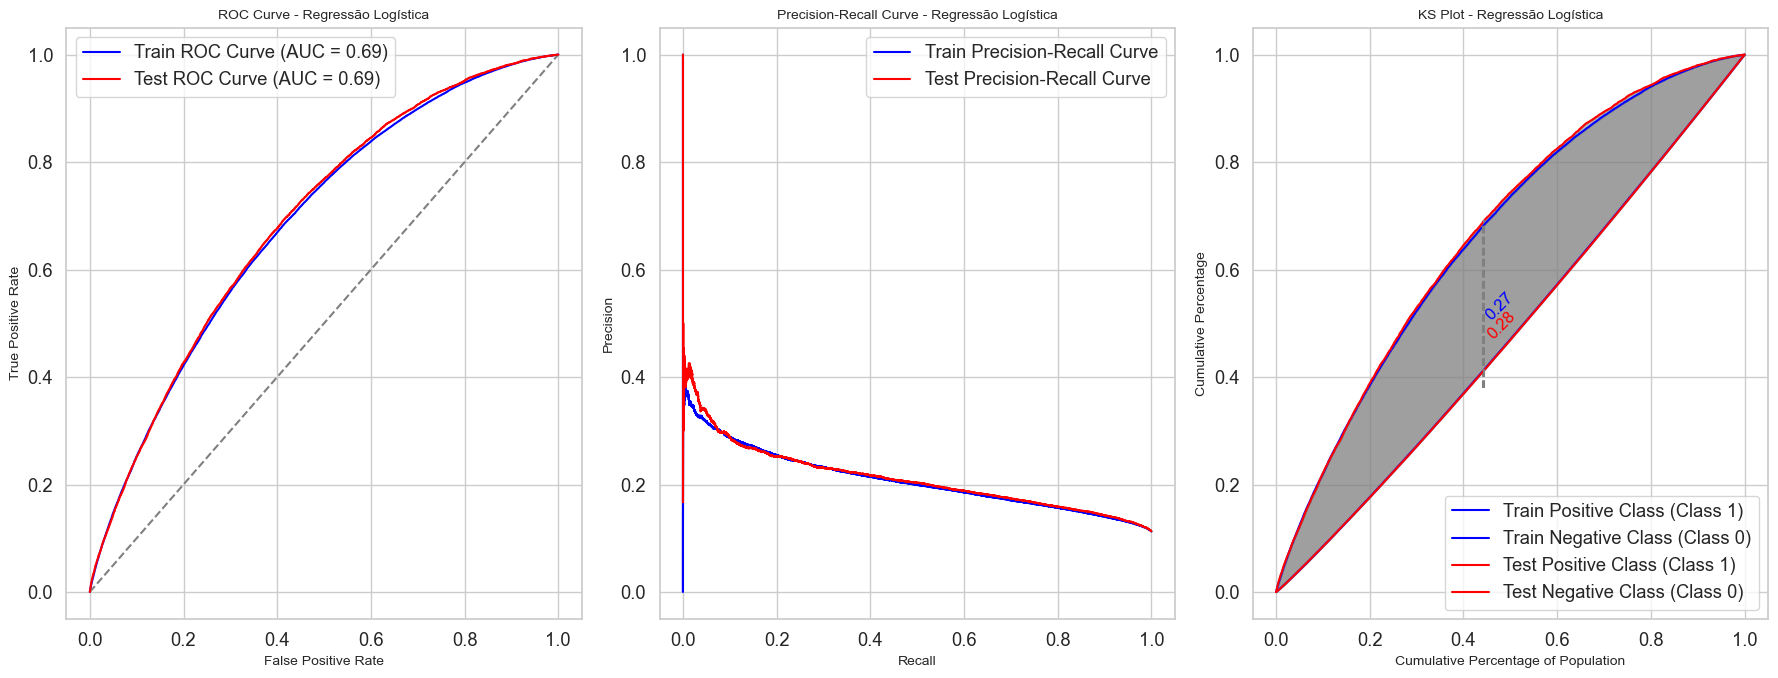

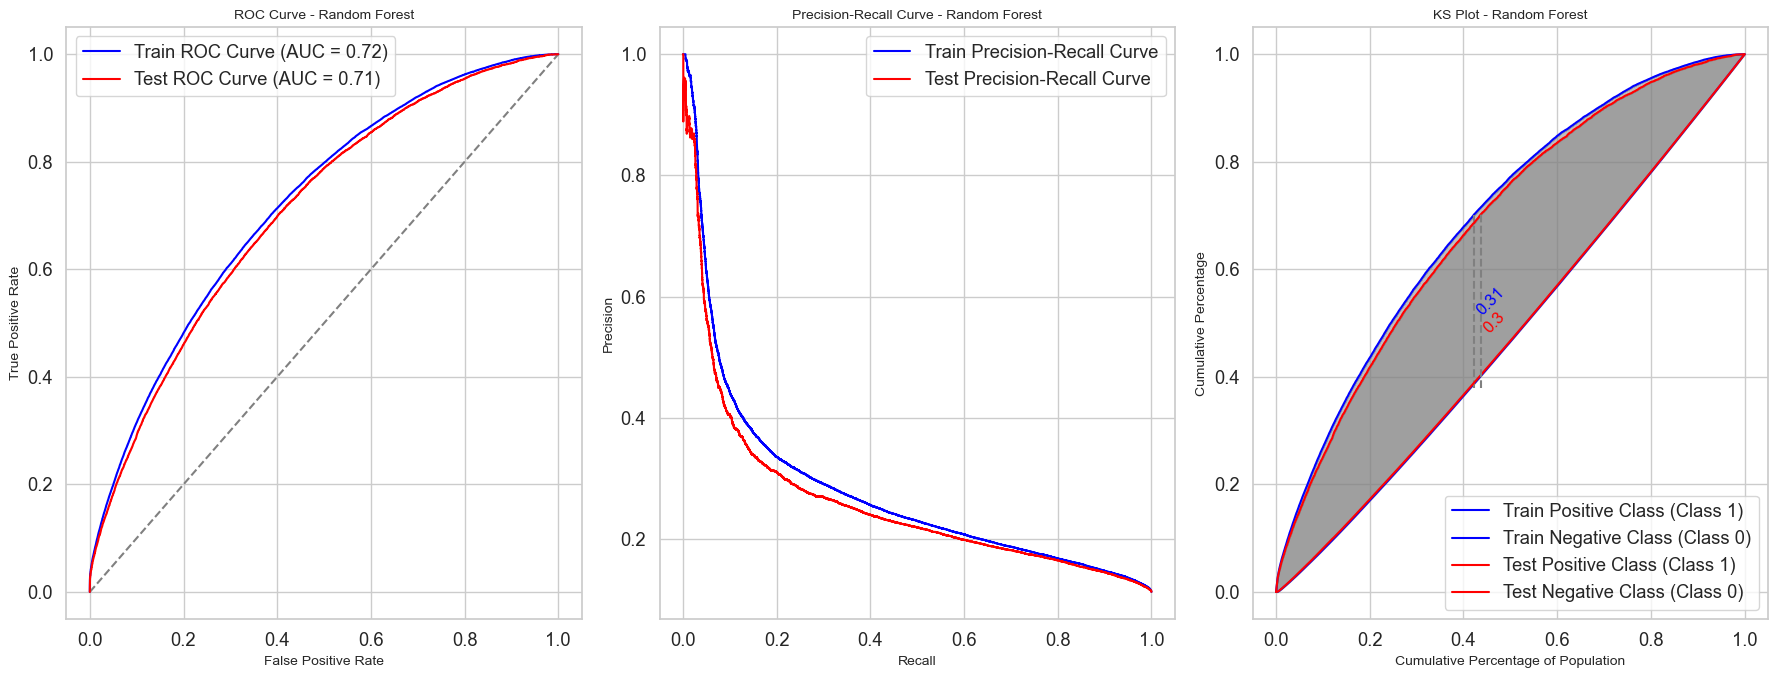

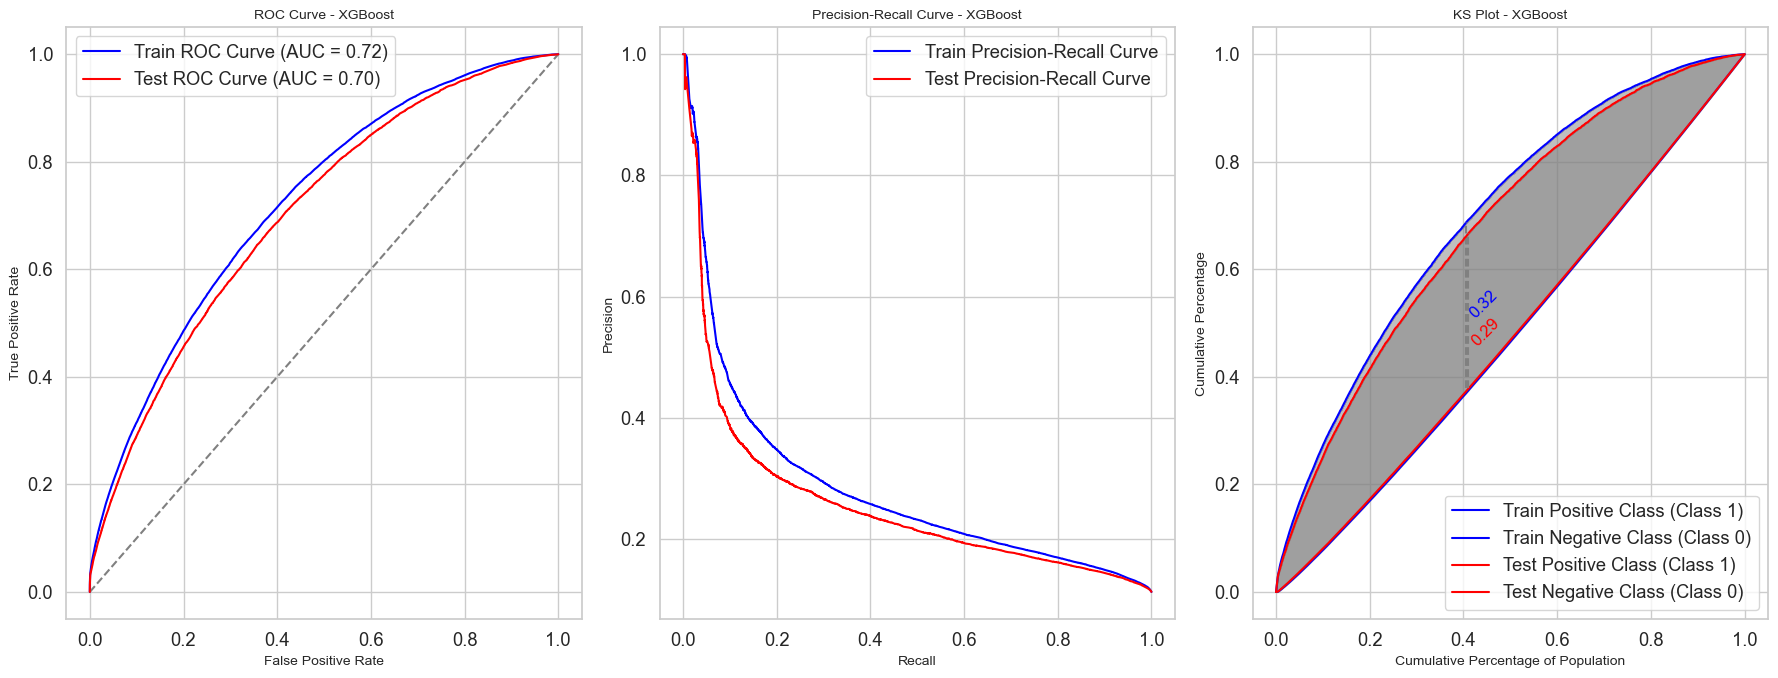

In [262]:
# Métricas Modelos
metricas_reg_logistic = metricas_classificacao('Regressão Logística', y_train, y_predict_train_reg_logistic, y_test, y_predict_test_reg_logistic, y_predict_proba_train_reg_logistic, y_predict_proba_test_reg_logistic)
metricas_reg_logistic_validacao_cruzada = validacao_cruzada_classificacao('Regressão Logística', df, 'loan_status', 5, 5)

metricas_random_forest = metricas_classificacao('Random Forest', y_train, y_predict_train_random_forest, y_test, y_predict_test_random_forest, y_predict_train_random_forest, y_predict_proba_test_random_forest)
metricas_random_forest_validacao_cruzada = validacao_cruzada_classificacao('Random Forest', df, 'loan_status', 5, 5)

metricas_xgboost = metricas_classificacao('XGBoost', y_train, y_predict_train_xgboost, y_test, y_predict_test_xgboost, y_predict_proba_train_xgboost, y_predict_proba_test_xgboost)
metricas_xgboost_validacao_cruzada = validacao_cruzada_classificacao('XGBoost', df, 'loan_status', 5, 5)

# Métricas Finais
print('Métricas Finais')
metricas_finais = metricas_classificacao_modelos_juntos(
    [
        metricas_reg_logistic, 
        metricas_reg_logistic_validacao_cruzada,
        metricas_random_forest,
        metricas_random_forest_validacao_cruzada,
        metricas_xgboost,
        metricas_xgboost_validacao_cruzada
    ]
)
display(metricas_finais)
auc_precision_recall_ks_juntos('Regressão Logística', 'loan_status', y_train, y_predict_train_reg_logistic, y_test, y_predict_test_reg_logistic, y_predict_proba_train_reg_logistic, y_predict_proba_test_reg_logistic)
auc_precision_recall_ks_juntos('Random Forest', 'loan_status', y_train, y_predict_train_random_forest, y_test, y_predict_test_random_forest, y_predict_proba_train_random_forest, y_predict_proba_test_random_forest)
auc_precision_recall_ks_juntos('XGBoost', 'loan_status', y_train, y_predict_train_xgboost, y_test, y_predict_test_xgboost, y_predict_proba_train_xgboost, y_predict_proba_test_xgboost)

# <font color='red' style='font-size: 40px;'> 5. Otimização do Modelo Escolhido </font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 5.1) Otimização de Hiperparâmetros </font>
<hr style='border: 2px solid green;'>

> 1. Optou-se por utilizar um Algoritmo de Busca Bayesiana para achar a melhor combinação de hiperparâmetros

> 2. Esse algoritmo aplica probabilidades condicionais para decidir, no fim, a combinação de hiperparâmetros que possui a maior probabilidade de maximizar a métrica desejada

> 3. Após a otimização, notou-se uma melhora expressiva da Precision

- Regularização L1 (Lasso): No XGBoost, o termo "reg_alpha" é usado para controlar a regularização L1. Ele adiciona uma penalidade proporcional à soma dos valores absolutos dos pesos dos nós terminais nas árvores. Isso incentiva o modelo a reduzir os pesos dos nós menos importantes ou remover completamente os nós irrelevantes.

- Regularização L2 (Ridge): No XGBoost, o termo "reg_lambda" é usado para controlar a regularização L2. Ele adiciona uma penalidade proporcional à soma dos quadrados dos pesos dos nós terminais nas árvores. Isso incentiva o modelo a reduzir a magnitude dos pesos em geral, evitando que se tornem muito grandes.

> 4. Finalmente, percebe-se que as Distribuições de Probabilidade do Modelo de Treino e Validação estão próximas, portanto, isso significa que o Modelo está performando da forma correta.


In [ ]:
def modelo_otimizado(classificador, x_train, y_train, x_test, y_test):
    def simple_imputer(df):

        df_aux = df.copy()
        imputer = SimpleImputer(strategy = 'median')
        imputer.fit(df_aux)

        return imputer
    
    cols = list(x_train.columns)
    imputer = simple_imputer(x_train)
    x_train = pd.DataFrame(imputer.transform(x_train), columns = x_train.columns)
    x_test = pd.DataFrame(imputer.transform(x_test), columns = x_test.columns)

    # Define o ColumnTransformer
    preprocessor = ColumnTransformer([
                ('imputer', make_pipeline(SimpleImputer(strategy='median')), cols),
                ('scaler', make_pipeline(MinMaxScaler()), cols)
            ])

    # Define o modelo de XGBoost com a otimização de hiperparâmetros via BayesSearch
    model = make_pipeline(
        preprocessor,
        BayesSearchCV(
            XGBClassifier(random_state=42, eval_metric='logloss', objective='binary:logistic'),
            {
                'n_estimators': (10, 15, 20, 50), # Número de Árvores construídas
                'max_depth': (4, 5, 7, 8, 9, 10), # Profundidade Máxima de cada Árvore
                'learning_rate': (0.01, 0.05), # Tamanho do passo utilizado no Método do Gradiente Descendente
                'reg_alpha':(0.5, 1), # Valor do Alpha aplicado durante a Regularização Lasso L1 
                'reg_lambda':(0.5, 1), # Valor do Lambda aplicado durante a Regularização Ridge L2
                'gamma':(0.5, 1), # Valor mínimo permitido para um Nó de Árvore ser aceito. Ajuda a controlar o crescimento das Árvores, evitando divisões insignificantes
                'colsample_bytree':(0.5, 1), # Porcentagem de Colunas utilizada para a amostragem aleatória durante a criação das Árvores
                'subsample':(0.5, 1), # Porcentagem de Linhas utilizada para a amostragem aleatória durante a criação das Árvores
                'scale_pos_weight':(3, 5, 8, 10, 12, 14) # Peso atribuído a classe positiva, aumentando a importância da classe minoritária
                'base_score':(0.30, 0.40, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90)
            },
            n_iter=10,
            random_state=42,
            n_jobs=-1,
            scoring='roc_auc',
            cv=5
        )
    )

    # Treina o modelo
    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    y_proba_train = model.predict_proba(x_train)
    y_proba_test = model.predict_proba(x_test)

    return model, y_pred_train, y_pred_test, y_proba_train, y_proba_test, model.named_steps['bayessearchcv'].best_params_


In [ ]:
# Modelo Otimizado
modelo_final = modelo_otimizado('XGBoost', x_train, y_train, x_valid, y_valid)[0]
melhores_parametros = modelo_otimizado('XGBoost', x_train, y_train, x_valid, y_valid)[5]

y_predict_train_otimizado = modelo_otimizado('XGBoost', x_train, y_train, x_valid, y_valid)[1]
y_predict_valid_otimizado = modelo_otimizado('XGBoost', x_train, y_train, x_valid, y_valid)[2]
y_proba_train_otimizado = modelo_otimizado('XGBoost', x_train, y_train, x_valid, y_valid)[3]
y_proba_valid_otimizado = modelo_otimizado('XGBoost', x_train, y_train, x_valid, y_valid)[4]
metricas_otimizadas = metricas_classificacao('XGBoost', y_train, y_predict_train_otimizado, y_valid, y_predict_valid_otimizado)

# Métricas Otimizadas
print(f'Melhores Parâmetros: {melhores_parametros}')
print('Métricas Finais')
display(metricas_otimizadas)
print()
predict_proba_train = pd.DataFrame(y_proba_train_otimizado.tolist(), columns=['predict_proba_0', 'predict_proba_1'])
predict_proba_valid = pd.DataFrame(y_proba_valid_otimizado.tolist(), columns=['predict_proba_0', 'predict_proba_1'])

plota_histograma(['predict_proba_1'], predict_proba_train, 1, 1, 'Distribuição de Probabilidade da Classe 1 - Treino')
plota_histograma(['predict_proba_1'], predict_proba_valid, 1, 1, 'Distribuição de Probabilidade da Classe 1 - Validação')


# <font color='green' style='font-size: 30px;'> 5.2) Otimização do Limiar de Decisão de Probabilidade </font>
<hr style='border: 2px solid green;'>

> 1. Pelo corte de Probabilidade, nota-se que o melhor corte é 0.54, pois ele é o que retorna o melhor lucro possível


In [ ]:
def modelo_corte_probabilidade(classificador, x_train, y_train, x_test, y_test, target):

    # Define as colunas categóricas e numéricas
    qualitativas_numericas = [column for column in x_train.columns if x_train[column].nunique() <= 5]
    discretas = [column for column in x_train.columns if (x_train[column].nunique() > 5) and (x_train[column].nunique() <= 50)]
    continuas = [column for column in x_train.columns if x_train[column].nunique() > 50]
    
    list_threshold = [0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 0.54, 0.55]
    list_lucro = []
    for threshold in list_threshold:
        # Define o ColumnTransformer
        preprocessor = ColumnTransformer([
                    ('qualitativas_numericas', make_pipeline(SimpleImputer(strategy='constant')), qualitativas_numericas),
                    ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                    ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
        ])
        model = make_pipeline(
        preprocessor,
        XGBClassifier(
            random_state=42, 
            eval_metric='logloss', 
            objective='binary:logistic', 
            n_estimators = 15, 
            max_depth = 7, 
            learning_rate = 0.029858668143868672,
            reg_alpha = 0.5255672768385259,
            reg_lambda = 0.785388901339449,
            gamma = 0.9600046132186582,
            colsample_bytree = 0.7717015338451563,
            subsample = 0.6928647954923324,
            scale_pos_weight = 8,
            base_score = threshold
        )
        )
        
        model.fit(x_train, y_train)

        y_pred = model.predict(x_test)
        lucro = retorno_financeiro(target, y_test, y_pred)
        list_lucro.append(lucro)
    
    corte_probabilidade = pd.DataFrame({'threshold':list_threshold, 'lucro':list_lucro})
    return corte_probabilidade

In [ ]:
cortes_probabilidade = modelo_corte_probabilidade('XGBoost', x_train, y_train, x_valid, y_valid, 'TARGET')
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 5))  # Define o tamanho do gráfico
plt.plot(cortes_probabilidade['threshold'], cortes_probabilidade['lucro'], marker='o', color='#1FB3E5', linewidth=2)
for x, y in zip(cortes_probabilidade['threshold'], cortes_probabilidade['lucro']):
    plt.vlines(x, 0, y, colors='gray', linestyles='dashed', alpha=1)
plt.title("Calibração do Threshold de Probabilidade para Maximização do Lucro")
plt.xlabel('Threshold Probabilidade', fontsize = 10)
plt.ylabel('Lucro (R$)', fontsize = 10)
plt.xticks(cortes_probabilidade['threshold'], rotation=45, ha='right', fontsize = 10)
# Encontra o índice do maior valor de lucro
indice_maior_lucro = cortes_probabilidade['lucro'].idxmax()

# Anotação com o valor do maior lucro
plt.text(cortes_probabilidade['threshold'][indice_maior_lucro], cortes_probabilidade['lucro'][indice_maior_lucro] + 500,
         f'Maior lucro: {cortes_probabilidade["lucro"].max()}', fontsize=12, color='red',
         ha='left', va='center')
plt.locator_params(axis='y', nbins=8)
plt.tight_layout()
plt.show()


# <font color='red' style='font-size: 40px;'> 6. Criação da Política de Crédito para Baseline</font>
<hr style='border: 2px solid red;'>

# <font color='red' style='font-size: 40px;'> 7. Tradução e Quantificação dos Resultados</font>
<hr style='border: 2px solid red;'>